<center><span style="font-family:Comic Sans MS; color:navy "><h1>Regression with an Abalone Dataset</h1></span></center>


# <b>a <span style='color:#94D4F6'>|</span> Table of Conents</b>
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Visualization](#3)
- [4. Preprocessing](#4)
- [6. Split Dataset](#6)
- [7. Modeling](#7)
- [8. Evaluation](#8) 
- [9. Predict test data](#9)
- [10. Evaluation](#10)
- [11. Submission](#11)

<a id="1"></a>
# <b>1 <span style='color:#94D4F6'>|</span> Import Libraries</b>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # I just need this for prevent the duplicate some file

<a id="2"></a>
# <b>2 <span style='color:#94D4F6'>|</span> Read Dataset</b>

In [57]:
df = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")
sample = pd.read_csv("./Data/sample_submission.csv")

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>2.1 |</span></b> Import Main Dataset </b></p></div>

<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
In this notebook 📔, I will be using a dataset generated by Kaggle, along with the main dataset. We will discuss the prediction outcome in our Git commit message.

You can find the main dataset here: <a href="https://archive.ics.uci.edu/dataset/1/abalone">abalone</a>. Additionally, you can import the dataset using the following command:

In [58]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Specify the file name and path
file_path = './Data/abalone_dataset.csv'


if not os.path.exists(file_path):
    # Fetch the dataset
    abalone = fetch_ucirepo(id=1)
    
    # Combine features and targets into a single DataFrame
    df = pd.DataFrame(abalone.data.features, columns=abalone.feature_names)
    df[abalone.target_name] = abalone.data.targets

    df.to_csv(file_path, index=False)
    print('Dataset imported and saved successfully.')
else:
    print('Dataset file already exists. Skipping import.')

Dataset file already exists. Skipping import.


In [59]:
# now we can use that
md = pd.read_csv("./Data/abalone_dataset.csv")

In [60]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
In the above, you can see our dataset format. We have 10 attributes, and we need to delete some extra columns from our dataset!

In [61]:
md.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Unnamed: 8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
And this is the main dataset that we discussed before. As you can see, we have 9 columns, and some column names are different from our dataset for this computation. Based on the modifications that the main dataset can bring us, we will changed the column names, and we will perform some preprocessing operations on it.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
As you can see, our dataset does not contain any null values. However, there are some categorical variables present. We need to perform preprocessing operations on these variables to transform them into suitable inputs for our modeling step.

#### Shape

In [63]:
print("Shape of training dataset: ")
print("Ther are {} rows and {} coulumns id training dataset".format(df.shape[0],df.shape[1]))
print("-------------------------------------------")
print("Shape of test dataset: ")
print("Ther are {} rows and {} coulumns id test dataset".format(test.shape[0],test.shape[1]))
print("-------------------------------------------")
print("Shape of main dataset: ")
print("Ther are {} rows and {} coulumns id main dataset".format(md.shape[0],md.shape[1]))

Shape of training dataset: 
Ther are 90615 rows and 10 coulumns id training dataset
-------------------------------------------
Shape of test dataset: 
Ther are 60411 rows and 9 coulumns id test dataset
-------------------------------------------
Shape of main dataset: 
Ther are 4177 rows and 9 coulumns id main dataset


### Describe the dataset

In [64]:
df.describe().style.background_gradient(cmap = "summer")

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
And here is some statistical information about our dataset. I will create clear plots to present the data more effectively.

### Columns

In [65]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

### Drop unnecessary columns

In [66]:
df = df.drop(df.columns[0], axis=1) # here we delete the ID columns
test = test.drop(test.columns[0],axis=1) # ...

### Determine the Categorical and Numerical Features

In [68]:
target = "Rings"
obj_col = [x for x in df.select_dtypes(include=['object']).columns if x!= target]
num_col = [x for x in df.select_dtypes(exclude =['object']).columns if x!= target]
print(f'obj_columns: {obj_col}')
print(f'num_columns: {num_col}')

obj_columns: ['Sex']
num_columns: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']


<a id="3"></a>
# <b>3 <span style='color:#94D4F6'>|</span> Explanatory Data Analysis (EDA)</b>
<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">

In [69]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum())/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    return sum
summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count
Sex,object,0,0.000000,3,90615
Length,float64,0,0.000000,157,90615
Diameter,float64,0,0.000000,126,90615
Height,float64,0,0.000000,90,90615
Whole weight,float64,0,0.000000,3175,90615
Whole weight.1,float64,0,0.000000,1799,90615
Whole weight.2,float64,0,0.000000,979,90615
Shell weight,float64,0,0.000000,1129,90615
Rings,int64,0,0.000000,28,90615


In [70]:
print('----------test data ------------')
summary(test).style.background_gradient(cmap='Blues')

----------test data ------------


,dtypes,missing#,missing%,uniques,count
Sex,object,0,0.000000,3,60411
Length,float64,0,0.000000,148,60411
Diameter,float64,0,0.000000,130,60411
Height,float64,0,0.000000,85,60411
Whole weight,float64,0,0.000000,3037,60411
Whole weight.1,float64,0,0.000000,1747,60411
Whole weight.2,float64,0,0.000000,960,60411
Shell weight,float64,0,0.000000,1089,60411


### Checking Correlation 

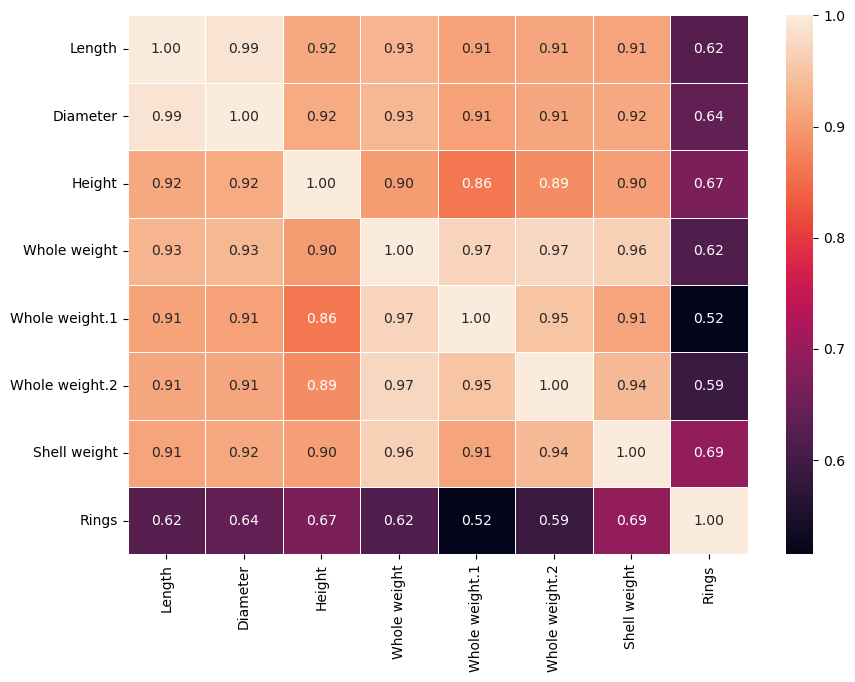

In [71]:
selected_features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']

# Create a subset correlation matrix for the selected features
subset_correlation_matrix = df[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    subset_correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=.5
)

plt.show()

<a id="3"></a>
# <b>3 <span style='color:#94D4F6'>|</span> PreProcessing</b>

In [19]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [19]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
